## Rough Stuff

In [27]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [22]:
epochs = 10
bs = 128
lr = 1e-3
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )
def check_cats(data, cat_vars):
    for i in cat_vars:
        data[f'{i}'] = data[f'{i}'].astype('category').cat.codes
    return data
DIR = "../input"

colnames = ['Time', 'Duration', 'SrcDevice', 'DstDevice', 'Protocol', 'SrcPort', 'DstPort', 'SrcPackets', 
       'DstPackets', 'SrcBytes', 'DstBytes']
cat_vars = ['SrcDevice', 'DstDevice','Protocol','SrcPort', 'DstPort']
cont_vars = ['Time', 'Duration', 'SrcPackets', 'DstPackets', 'SrcBytes', 'DstBytes']
train_df = pd.read_csv(os.path.join(DIR, 'netflow_day-03.csv'),names = colnames)
train_df = check_cats(train_df,cat_vars)
x_train, x_valid, y_train, y_valid = train_test_split(train_df.iloc[:100000], train_df.iloc[:100000], test_size=0.33, random_state=42)
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train.values, y_train.values, x_valid.values, y_valid.values))
x_train, y_train, x_valid, y_valid = x_train.float(), y_train.float(), x_valid.float(), y_valid.float()
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
dataloader, valid_dl = get_data(train_ds, valid_ds, bs)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(scaled_df1.iloc[:100000], scaled_df1.iloc[:100000], test_size=0.33, random_state=42)
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train.values, y_train.values, x_valid.values, y_valid.values))
x_train, y_train, x_valid, y_valid = x_train.float(), y_train.float(), x_valid.float(), y_valid.float()
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
dataloader, valid_dl = get_data(train_ds, valid_ds, bs)
epochs = 30
loss_hist = np.zeros(epochs)
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(11, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 11),
            nn.Sigmoid()) 

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = autoencoder().cuda()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        for data in dataloader:
            img, _ = data
            img = img.view(img.size(0), -1)
            img = Variable(img).cuda()
            # ===================forward=====================
            output = model(img)
            loss = criterion(output, img)
            # ===================backward====================
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # ===================log========================
        loss_hist[epoch] = loss.item()
        print('epoch [{}/{}], loss:{:.4f}'
              .format(epoch + 1, epochs, loss.item()))
    
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            #xb,yb = xb.float(),yb.long()
            print(xb.shape,yb.shape)
            loss_batch(model, loss_func, xb.squeeze(1), yb.squeeze(1), opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [26]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(11, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), 
            nn.Linear(64, 12), 
            nn.ReLU(True), 
            nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 11), 
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.9)#Adam(model.parameters(), lr=lr, weight_decay=1e-5)

for epoch in range(epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, epochs, loss.item()))

epoch [1/10], loss:2913465856.0000
epoch [2/10], loss:16078373888.0000
epoch [3/10], loss:2856214528.0000
epoch [4/10], loss:2874997504.0000
epoch [5/10], loss:103913979904.0000
epoch [6/10], loss:2878187520.0000
epoch [7/10], loss:191672830918656.0000
epoch [8/10], loss:2851540736.0000
epoch [9/10], loss:3064711168.0000
epoch [10/10], loss:2963160064.0000


## Basic AutoEncoder

In [11]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import os
import seaborn as sns

#if not os.path.exists('./mlp_img'):
#    os.mkdir('./mlp_img')

epochs = 30
bs = 128
lr = 1e-3
loss_func = F.binary_cross_entropy
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    val_loss_hist = np.zeros(epochs)
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        val_loss_hist[epoch] = val_loss
        print(epoch, val_loss)
    return val_loss_hist

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def preprocess(x, y):
    return x.view(-1,11).to(dev), y.to(dev)

class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))
            
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(11, 3),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(3, 11),
            nn.Sigmoid()) 

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [8]:
def check_cats(data, cat_vars):
    for i in cat_vars:
        data[f'{i}'] = data[f'{i}'].astype('category').cat.codes
    return data
DIR = "../input"

colnames = ['Time', 'Duration', 'SrcDevice', 'DstDevice', 'Protocol', 'SrcPort', 'DstPort', 'SrcPackets', 
       'DstPackets', 'SrcBytes', 'DstBytes']
cat_vars = ['SrcDevice', 'DstDevice','Protocol','SrcPort', 'DstPort']
cont_vars = ['Time', 'Duration', 'SrcPackets', 'DstPackets', 'SrcBytes', 'DstBytes']
train_df = pd.read_csv(os.path.join(DIR, 'netflow_day-03.csv'),names = colnames)
train_df = check_cats(train_df,cat_vars)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(scaled_df1.iloc[:100000], scaled_df1.iloc[:100000], test_size=0.33, random_state=42)
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train.values, y_train.values, x_valid.values, y_valid.values))
x_train, y_train, x_valid, y_valid = x_train.float(), y_train.float(), x_valid.float(), y_valid.float()
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

0 0.6669447758270033
1 0.604098239103953
2 0.5542344042171131
3 0.514370773748918
4 0.4821441354968331
5 0.45574090310299037
6 0.4337046409086748
7 0.4149084622715459
8 0.39852090395580636
9 0.38389956945361514
10 0.3705646456010414
11 0.3582103838198113
12 0.34670302292072414
13 0.33601489964398473
14 0.32619979724017056
15 0.3173407790733106
16 0.309511381929571
17 0.30274079421794775
18 0.29700028675252743
19 0.29221796787146365
20 0.2882712232416326
21 0.2850362696214156
22 0.2823825018478162
23 0.2801971455342842
24 0.2783871146548878
25 0.2768771649057215
26 0.27560972101760634
27 0.2745376446391597
28 0.27362406504515446
29 0.27283987029393514


In [25]:
model = autoencoder()
model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
simpleAE = fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.6543062281608581
1 0.585345525712678
2 0.5197592782396259
3 0.45371992526632365
4 0.3931019255031239
5 0.3479185333974434
6 0.3196395395524574
7 0.3029607883077679
8 0.29281271292224076
9 0.286243263909311
10 0.28174673589070637
11 0.2785396403616125
12 0.2761773215568427
13 0.27438637563676543
14 0.27299451344663445
15 0.271883864662864
16 0.27097896861307547
17 0.2702274462237503
18 0.26959044147260264
19 0.2690431593764912
20 0.26856685293804516
21 0.26814516122413407
22 0.2677680388508421
23 0.26742672470844153
24 0.26711598762598904
25 0.26683040456338364
26 0.26656473709597733
27 0.2663160858515537
28 0.2660825413501624
29 0.26586106967926026


In [15]:
model = autoencoder()
model.to(dev)
opt1 = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
simpleAE1 = fit(epochs, model, loss_func, opt1, train_dl, valid_dl)

0 0.31205976059220053
1 0.26849677307677994
2 0.24780692478743466
3 0.2327993916309241
4 0.22368441401828418
5 0.21890030331683882
6 0.21611758638150763
7 0.2141458001642516
8 0.21269397591460834
9 0.21160390483249317
10 0.21078291600761992
11 0.21016171690911958
12 0.2096844047163472
13 0.20931457792628896
14 0.20907305800192283
15 0.20887211404063485
16 0.20873287388050196
17 0.20862204795533962
18 0.2085426251743779
19 0.20848603267019444
20 0.20843476207689807
21 0.2083979402997277
22 0.2083794938434254
23 0.20833340220017868
24 0.20832319874835736
25 0.20831166450905078
26 0.20828816736828198
27 0.20828475853168604
28 0.20827728128794468
29 0.20827567959193027


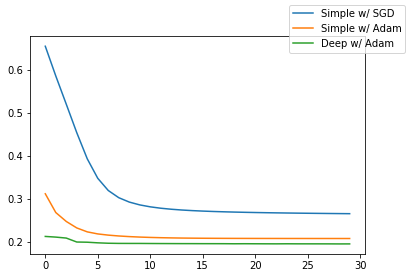

In [26]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(np.arange(epochs),simpleAE,  label = 'Simple w/ SGD')
sub.plot(np.arange(epochs),simpleAE1, label = 'Simple w/ Adam')
sub.plot(np.arange(epochs),deepAE, label = 'Deep w/ Adam')
fig.legend()


In [24]:
class autoencoder1(nn.Module):
    def __init__(self):
        super(autoencoder1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(11, 11),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(11, 11),
            nn.Sigmoid()) 

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = autoencoder1()
model.to(dev)
opt1 = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
SimpleAE2 = fit(epochs, model, loss_func, opt1, train_dl, valid_dl)

0 0.26751862078002003
1 0.23547015824462428
2 0.21451984132058693
3 0.2047585850014831
4 0.20169808348381157
5 0.19934087472612208
6 0.1976399595520713


KeyboardInterrupt: 

## Deep AutoEncoder

In [22]:
class deep_autoencoder(nn.Module):
    def __init__(self):
        super(deep_autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(11, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), 
            nn.Linear(64, 12), 
            nn.ReLU(True), 
            nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 11), 
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [23]:
model = deep_autoencoder()
model.to(dev)
opt1 = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
deepAE = fit(epochs, model, loss_func, opt1, train_dl, valid_dl)

0 0.21309232634486575
1 0.21153576509519056
2 0.20928439075657815
3 0.20012470045595457
4 0.1996741162141164
5 0.19823709565942937
6 0.19728516366626278
7 0.19691369293314037
8 0.19685749834234065
9 0.19683286277091863
10 0.1966789506854433
11 0.19656388657743282
12 0.19648168834411736
13 0.19640413371360663
14 0.19637420321594584
15 0.19629845617395458
16 0.19628056835766994
17 0.19623680180130582
18 0.19606295159368803
19 0.19617565461722286
20 0.196066292311206
21 0.19597694072578892
22 0.19590190319942705
23 0.19605132378953877
24 0.19592950930739894
25 0.1959013714356856
26 0.1958856367378524
27 0.19584163894797815
28 0.19572545883511053
29 0.19577503286347245


## Convolutional AutoEncoder

In [218]:
class conv_autoencoder(nn.Module):
    def __init__(self):
        super(conv_autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(1, 1, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool1d(2, stride=2),  # b, 16, 5, 5
            nn.Conv1d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            nn.MaxPool1d(2, stride=1)  # b, 8, 2, 2
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(8, 16, 3, stride=2),  # b, 16, 5, 5
            nn.ReLU(True),
            nn.ConvTranspose1d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
            nn.ReLU(True),
            nn.ConvTranspose1d(8, 1, 2, stride=2, padding=1),  # b, 1, 28, 28
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [228]:
next(iter(train_dl_w))[0].shape

torch.Size([128, 1, 11])

In [227]:
train_dl_w = WrappedDataLoader(train_dl, preprocess)
valid_dl_w = WrappedDataLoader(valid_dl, preprocess)
model = conv_autoencoder()
model.to(dev)
convAE = fit(epochs, model, loss_func, opt1, train_dl_w, valid_dl_w)

RuntimeError: CUDA out of memory. Tried to allocate 17179869184.00 GiB (GPU 0; 7.94 GiB total capacity; 391.50 KiB already allocated; 7.49 GiB free; 632.50 KiB cached)

## Why we need to normalize the data

/home/paperspace/anaconda3/envs/fastaiv1/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int16, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/paperspace/anaconda3/envs/fastaiv1/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int16, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/paperspace/anaconda3/envs/fastaiv1/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int8, int16, int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


NameError: name 'sns' is not defined

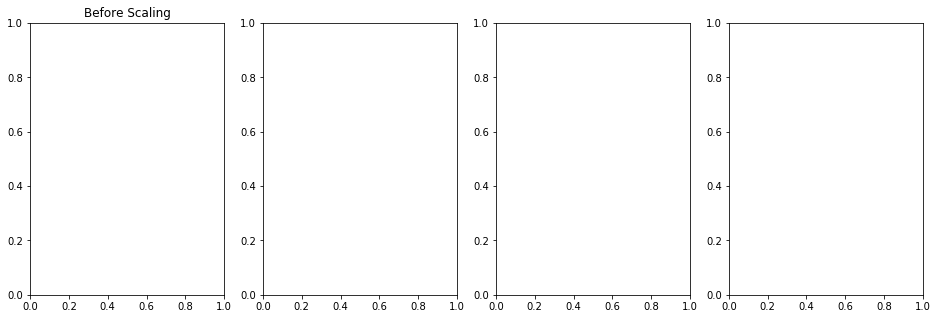

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(train_df)
scaled_df = pd.DataFrame(scaled_df, columns=colnames)
scaler1 = MinMaxScaler()
scaled_df1 = scaler1.fit_transform(train_df)
scaled_df1 = pd.DataFrame(scaled_df1, columns=colnames)
scaler2 = RobustScaler()
scaled_df2 = scaler2.fit_transform(train_df)
scaled_df2 = pd.DataFrame(scaled_df2, columns=colnames)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(train_df['SrcDevice'], ax=ax1)
sns.kdeplot(train_df['DstDevice'], ax=ax1)
sns.kdeplot(train_df['SrcPort'], ax=ax1)
sns.kdeplot(train_df['DstPort'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['SrcDevice'], ax=ax2)
sns.kdeplot(scaled_df['DstDevice'], ax=ax2)
sns.kdeplot(scaled_df['SrcPort'], ax=ax2)
sns.kdeplot(scaled_df['DstPort'], ax=ax2)
ax3.set_title('After Min-Max Scaler')
sns.kdeplot(scaled_df1['SrcDevice'], ax=ax3)
sns.kdeplot(scaled_df1['DstDevice'], ax=ax3)
sns.kdeplot(scaled_df1['SrcPort'], ax=ax3)
sns.kdeplot(scaled_df1['DstPort'], ax=ax3)
ax4.set_title('After Robust Scaler')
sns.kdeplot(scaled_df2['SrcDevice'], ax=ax4)
sns.kdeplot(scaled_df2['DstDevice'], ax=ax4)
sns.kdeplot(scaled_df2['SrcPort'], ax=ax4)
sns.kdeplot(scaled_df2['DstPort'], ax=ax4)
plt.show()

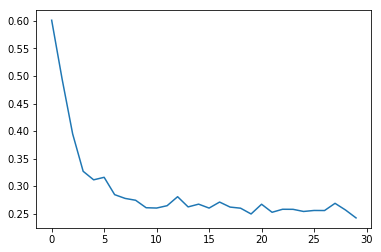

In [59]:
sns.lineplot(np.arange(epochs),loss_hist)

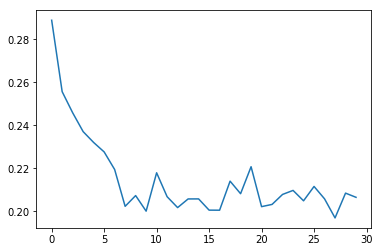

In [61]:
sns.lineplot(np.arange(epochs),loss_hist)